# Convolutional NN

In [15]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [16]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [17]:
train,test = load_mnist(500)

In [18]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [19]:
preprocess(train)
preprocess(test)

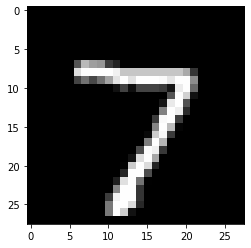

In [20]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [21]:
from src.si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from src.si.util.activation import Tanh, Sigmoid

Build the model

In [22]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [23]:
net.fit(train)

epoch 1/500 error=0.3738979022593746
epoch 2/500 error=0.3667521574954444
epoch 3/500 error=0.360727518074159
epoch 4/500 error=0.3555367483443153
epoch 5/500 error=0.3509504230682069
epoch 6/500 error=0.34679176799692346
epoch 7/500 error=0.3429369240132186
epoch 8/500 error=0.3393016266674982
epoch 9/500 error=0.3358297565160989
epoch 10/500 error=0.3324854124144253
epoch 11/500 error=0.329246242295263
epoch 12/500 error=0.32609775089625603
epoch 13/500 error=0.32302887274028314
epoch 14/500 error=0.32002887015107984
epoch 15/500 error=0.31708542950146656
epoch 16/500 error=0.31418375167299184
epoch 17/500 error=0.3113064017270213
epoch 18/500 error=0.3084336800361257
epoch 19/500 error=0.3055442996540486
epoch 20/500 error=0.3026161953306695
epoch 21/500 error=0.29962733906525685
epoch 22/500 error=0.29655648563281634
epoch 23/500 error=0.29338381125795954
epoch 24/500 error=0.29009143939549953
epoch 25/500 error=0.2866638736522017
epoch 26/500 error=0.2830883713908531
epoch 27/500 

In [24]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
conv = net.layers[0]

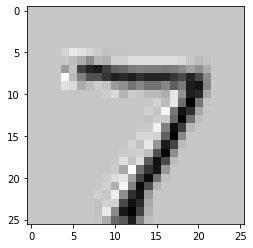

In [26]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [27]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  # sairá como 26*26*1
net.add(Activation(Tanh()))
net.add(MaxPooling((2, 2)))
net.add(Activation(Tanh()))
net.add(Flatten())
net.add(Dense(13*13*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

epoch 1/500 error=0.39313750803067077
epoch 2/500 error=0.3792977960653705
epoch 3/500 error=0.36553675468865043
epoch 4/500 error=0.3518553986560786
epoch 5/500 error=0.33828534609301075
epoch 6/500 error=0.32489115868664403
epoch 7/500 error=0.3117668119437481
epoch 8/500 error=0.2990132021964533
epoch 9/500 error=0.28671131791661625
epoch 10/500 error=0.2749042790941738
epoch 11/500 error=0.2635977826468029
epoch 12/500 error=0.2527726270167994
epoch 13/500 error=0.2423990866421128
epoch 14/500 error=0.23244669721890202
epoch 15/500 error=0.22288966149482423
epoch 16/500 error=0.21370855191170604
epoch 17/500 error=0.20489107395500036
epoch 18/500 error=0.1964317736987209
epoch 19/500 error=0.18833196525251233
epoch 20/500 error=0.18059901285160535
epoch 21/500 error=0.1732454450932407
epoch 22/500 error=0.16628736046318712
epoch 23/500 error=0.15974233132941315
epoch 24/500 error=0.15362692409136972
epoch 25/500 error=0.14795382437157514
epoch 26/500 error=0.14272955172981652
epoch

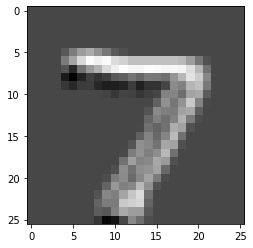

In [28]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))